In [1]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


Сгенерируем синтетические данные:

In [2]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

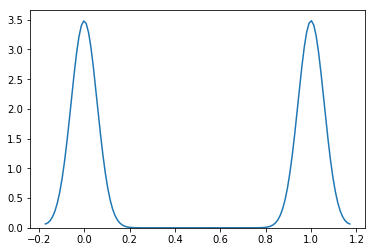

In [3]:
import seaborn as sns

sns.distplot(y_train, hist=False)

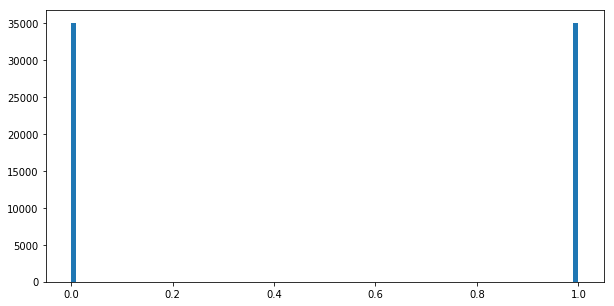

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.hist(y_train, bins=100)
plt.show()

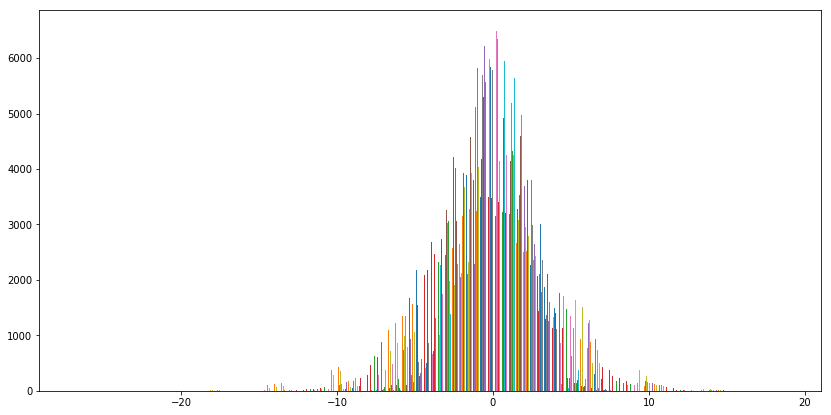

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,7))
ax.hist(X_train, bins=100)
plt.show()

Обучим метод опорных векторов с линейным ядром (LinearSVC/LinearSVR в scikit-learn):

In [6]:
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings("ignore")

In [7]:
# Similar to SVC with parameter kernel=’linear’, but implemented (реализован) in terms of liblinear 
# rather than libsvm, so it has more flexibility (гибкость) in the choice of penalties and loss functions 
# and should scale better to large numbers of samples.

clf = LinearSVC(random_state=0, tol=1e-5, max_iter=10000)
clf.fit(X_train, y_train)

LinearSVC(max_iter=10000, random_state=0, tol=1e-05)

На тестовой части посчитаем ROC-AUC, PR-AUC. Построим ROC и PR кривые:

In [8]:
import numpy as np
from sklearn import metrics

In [9]:
# decision_function(self, X) - predict confidence (доверит-ые) scores for samples.
y_score = clf.decision_function(X_test)
y_score[:10]

array([ 0.09131749,  0.64460526,  1.20319971,  1.06517495,  0.45844221,
        1.31426828, -0.13388295,  0.47382304, -1.04104165, -0.40389559])

In [10]:
# predict(self, X) - predict class labels for samples in X.
y_score_class = clf.predict(X_test)
y_score_class[:10]

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [11]:
metrics.roc_auc_score(y_test, y_score)

0.9258630086497088

In [12]:
# fpr: increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].
## возрастающее число ложных предсказаний, так что элемент i является ошибочным прогнозом с оценкой >= пороговые значения [i].
# tpr: increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].
# thresholds: decreasing thresholds on the decision function used to compute fpr and tpr.

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
print(fpr[0:10], tpr[0:10], thresholds[0:10], sep='\n\n')

[0.00000000e+00 0.00000000e+00 0.00000000e+00 6.64982045e-05
 6.64982045e-05 1.32996409e-04 1.32996409e-04 1.99494614e-04
 1.99494614e-04 2.65992818e-04]

[0.00000000e+00 6.68359845e-05 3.99010827e-02 3.99010827e-02
 4.77208929e-02 4.77208929e-02 4.79214009e-02 4.79214009e-02
 4.87234327e-02 4.87234327e-02]

[5.19332726 4.19332726 2.20617811 2.20608895 2.13430272 2.13296362
 2.13214725 2.13205381 2.12549575 2.12542769]


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

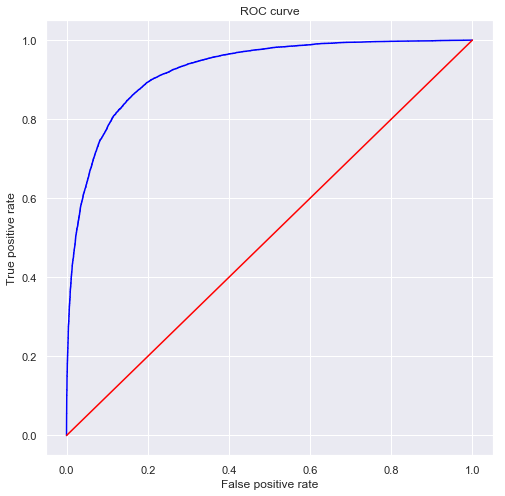

In [14]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")

plt.plot(fpr, tpr, color='blue')
plt.plot((0,1), (0,1), color='red')

In [15]:
# precision (точность): precision values such that element i is the precision of predictions with score >= thresholds[i] and the last element is 1.
# recall (полнота): decreasing recall values such that element i is the recall of predictions with score >= thresholds[i] and the last element is 0.
# thresholds: increasing thresholds on the decision function used to compute precision and recall.

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_score)
print(precision[0:10], recall[0:10], thresholds[0:10], sep='\n\n')

[0.49914929 0.49913258 0.49914923 0.49916589 0.49918254 0.4991992
 0.49921586 0.49923251 0.4992158  0.49923246]

[1.         0.99993316 0.99993316 0.99993316 0.99993316 0.99993316
 0.99993316 0.99993316 0.99986633 0.99986633]

[-2.83687273 -2.81484621 -2.79234067 -2.7865001  -2.76799638 -2.76272459
 -2.75796428 -2.75571589 -2.75214468 -2.7440609 ]


In [16]:
metrics.auc(sorted(precision), recall)

0.4256235373244593

In [17]:
average_precision = metrics.average_precision_score(y_test, y_score)
average_precision    # average precision-recall score

0.9247594639374799

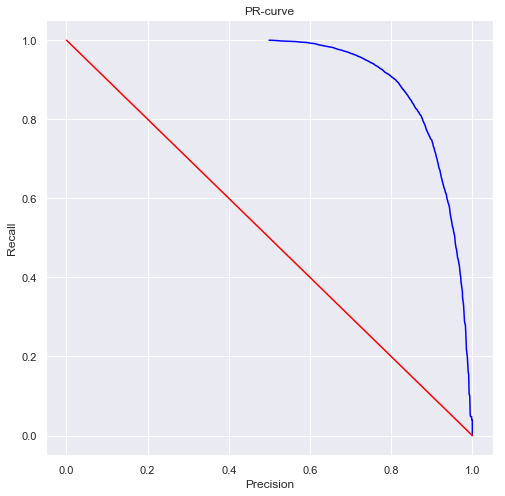

In [18]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR-curve")

plt.plot(sorted(precision), recall, color='blue')
plt.plot((1,0), (0,1), color='red')

Сгенерируем синтетический датасет с помощью make_classification с 2 признаками, обучим на нём метод опорных векторов:

In [19]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X, y = make_classification(
    n_samples=4000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

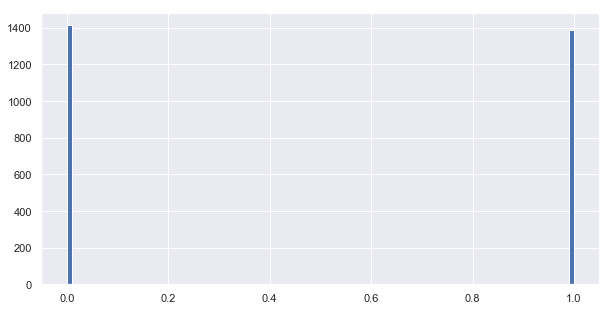

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.hist(y_train, bins=100)
plt.show()

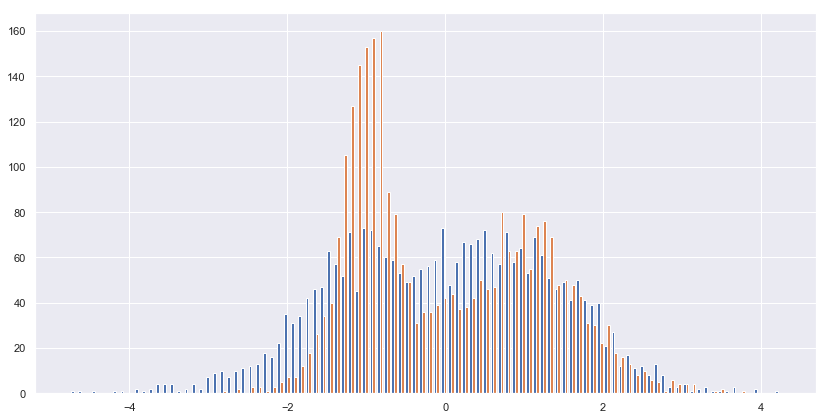

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,7))
ax.hist(X_train, bins=100)
plt.show()

In [22]:
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [23]:
# The implementation (реализация) is based on libsvm. The fit time scales at least quadratically 
# with the number of samples and may be impractical beyond tens of thousands of samples. 
# For large datasets consider using sklearn.svm.LinearSVC or sklearn.linear_model.SGDClassifier instead, 
# possibly after a sklearn.kernel_approximation.Nystroem transformer.

clf = SVC(kernel='linear', random_state=0, tol=1e-5, max_iter=10000)
clf.fit(X_train, y_train)

SVC(kernel='linear', max_iter=10000, random_state=0, tol=1e-05)

In [24]:
metrics.roc_auc_score(y_test, clf.decision_function(X_test))

0.9759973771876449

In [25]:
# get support vectors
clf.support_vectors_[:10]

array([[ 0.7645146 , -0.61036224],
       [ 0.60775216, -0.66072098],
       [ 0.19881074, -0.29415639],
       [ 0.38631   , -0.65027501],
       [-0.06061149, -0.51224735],
       [ 0.13532562, -0.33853911],
       [-0.42872773, -0.1137801 ],
       [ 0.23178676, -0.40563687],
       [ 0.04273962, -0.44259949],
       [-0.1798361 , -0.36780659]])

In [26]:
# get number of support vectors for each class
clf.n_support_

array([221, 221], dtype=int32)

In [27]:
# get shape of support vectors
clf.support_vectors_.shape

(442, 2)

In [28]:
# get indices of support vectors
clf.support_[:10]

array([  0,   1,  27,  42,  71,  85,  89,  96, 103, 112], dtype=int32)

In [29]:
# Coefficients for SVs 
clf.coef_

array([[0.14661316, 2.50078646]])

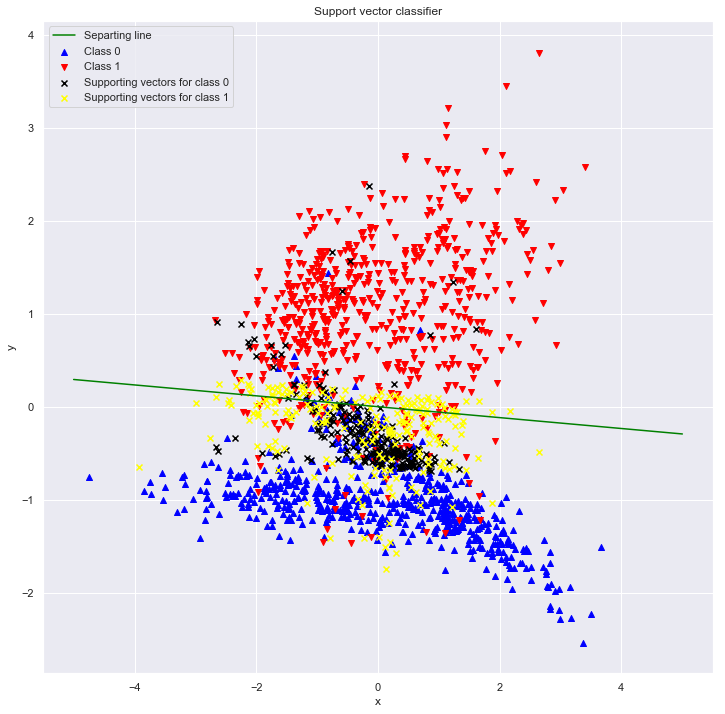

In [30]:
fig, ax = plt.subplots(1,1, figsize=(12,12))

plt.scatter(
    X_test[y_test==0][:,0], 
    X_test[y_test==0][:,1],
    color='blue',  
    marker='^',
    label='Class 0'
)
plt.scatter(
    X_test[y_test==1][:,0], 
    X_test[y_test==1][:,1], 
    color='red', 
    marker='v',
    label='Class 1'
)
plt.plot(
    (-2*clf.coef_.T[1], 2*clf.coef_.T[1]), 
    (2*clf.coef_.T[0], -2*clf.coef_.T[0]), 
    color='green',
    label='Separting line'
)

plt.scatter(
    clf.support_vectors_[:clf.n_support_[0], 0],
    clf.support_vectors_[:clf.n_support_[0], 1],
    color='black',
    marker='x',
    label='Supporting vectors for class 0'
)

plt.scatter(
    clf.support_vectors_[clf.n_support_[0]:, 0],
    clf.support_vectors_[clf.n_support_[0]:, 1],
    color='yellow',
    marker='x',
    label='Supporting vectors for class 1'
)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Support vector classifier")
plt.legend()

----
----
---

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[\alpha_i, \beta_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(\alpha_i + \beta_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже  функция, которая должна рисовать такие кривые:

In [31]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)  # "-" -> "+"
        bin_real_ratios.append(
                            np.sum(
                                y_test[(preds >= l) & (preds < r)] == 1
                                  ) / y_test[(preds >= l) & (preds < r)].shape[0]
                              )
        
    fig, ax = plt.subplots(1,1, figsize=(8,8))
    
    plt.xlabel("Middle points")
    plt.ylabel("Real rations")
    plt.plot((0,1), (0,1), color='red', label='Syntetic ideal probabilty')
    plt.plot(bin_middle_points, bin_real_ratios, color='blue', label='Calibration curve') 
    
    plt.legend()

Построим калибровочные кривые для логистической регрессии и метода опорных векторов. Изучим распределение ответов классификаторов <br>(с помощью plt.hist):

In [32]:
from sklearn.linear_model import LogisticRegressionCV

import warnings
warnings.filterwarnings("ignore")

In [33]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [34]:
clfLogit = LogisticRegressionCV(max_iter=10000, tol=1e-5)
clfLogit.fit(X_train, y_train)

LogisticRegressionCV(max_iter=10000, tol=1e-05)

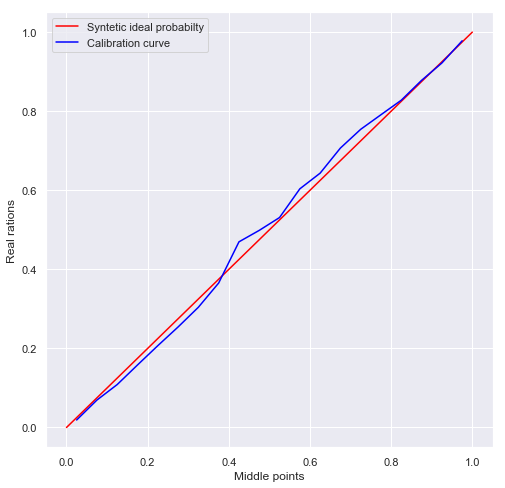

In [35]:
plot_calibration_curve(y_test, clfLogit.predict_proba(X_test)[:,1])

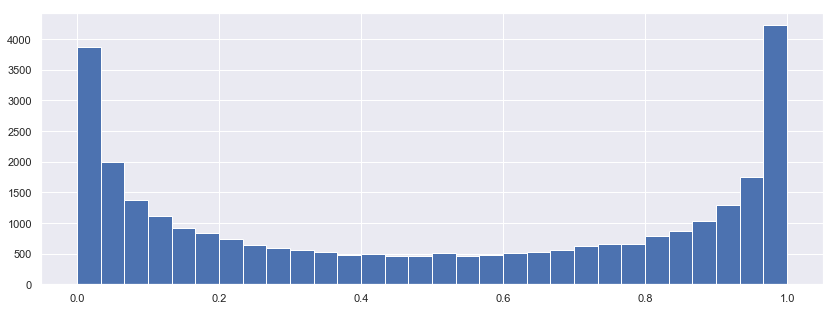

In [36]:
fig, ax = plt.subplots(1,1, figsize=(14,5))
plt.hist(clfLogit.predict_proba(X_test)[:,1], bins=30)
plt.show()

In [37]:
clfSVM = LinearSVC(random_state=0, tol=1e-5, max_iter=10000)
clfSVM.fit(X_train, y_train)

LinearSVC(max_iter=10000, random_state=0, tol=1e-05)

Посмотрим на распределение decision function, затем преобразуем это в какую-то вероятность, отнормировав:

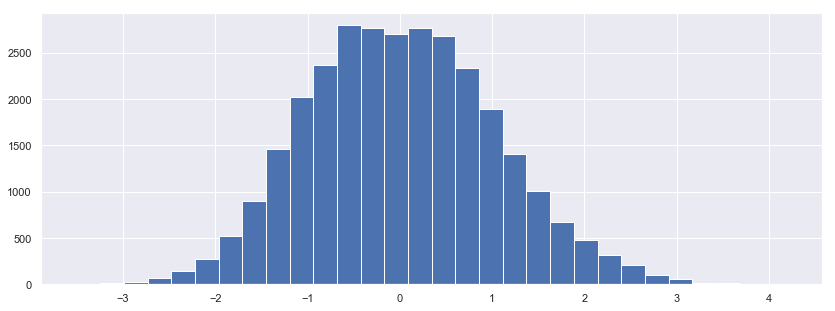

In [38]:
fig, ax = plt.subplots(1,1, figsize=(14,5))
plt.hist(clfSVM.decision_function(X_test), bins=30)
plt.show()

In [39]:
proba = ( clfSVM.decision_function(X_test) - clfSVM.decision_function(X_test).min() ) \
            / ( clfSVM.decision_function(X_test).max() - clfSVM.decision_function(X_test).min() )
proba[:10]

array([0.46692576, 0.53882795, 0.61141976, 0.59348283, 0.51463524,
       0.62585361, 0.43765998, 0.51663405, 0.31977071, 0.40257064])

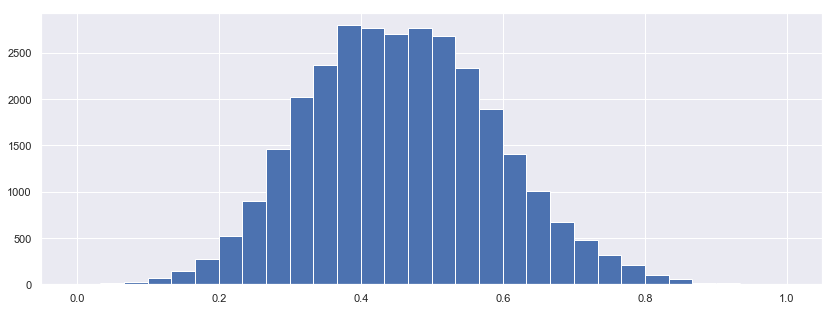

In [40]:
fig, ax = plt.subplots(1,1, figsize=(14,5))
plt.hist(proba, bins=30)
plt.show()

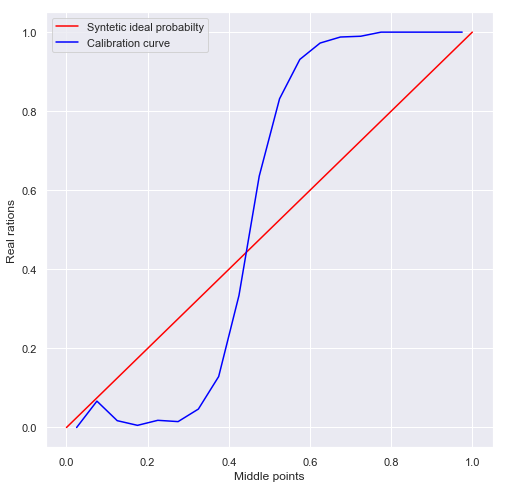

In [41]:
plot_calibration_curve(y_test, proba)

Вывод: все не очень хорошо.

Ключевое отличие в том, что вероятность, выдаваемая методом опорных векторов, концентируется вокруг 1/2 (то есть, неуверенности). Логично, ведь строится разделяющая гиперплоскость и множество объектов может находиться поблизости от  кривой, а самых далеких от неё может быть не так уж и много, тогда как логрег именно специально обучен предсказывать вероятности и работает по другому принципу.

Воспользуемся ```CalibratedClassifierCV``` из sklearn для калибровки вероятностей метода опорных векторов на обучении и построим с его помощью предсказания для тестовой выборки. Нарисуем для них калибровочную кривую:

In [42]:
from sklearn.calibration import CalibratedClassifierCV

warnings.filterwarnings("ignore")

In [43]:
calibrated_clf = CalibratedClassifierCV(
                                        LinearSVC(random_state=0, tol=1e-5, max_iter=10000), 
                                        method='sigmoid'
                                    )
calibrated_clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(max_iter=10000, random_state=0,
                                                tol=1e-05))

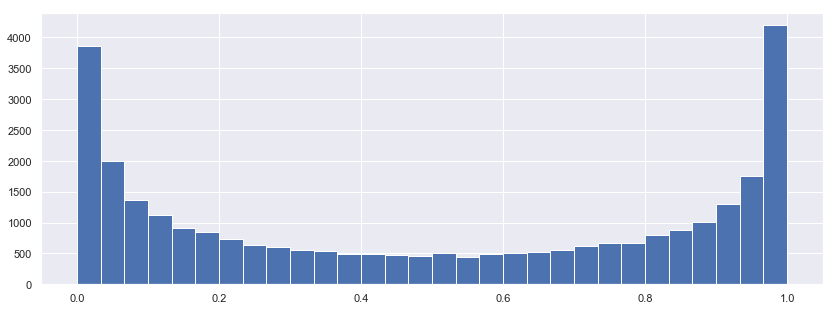

In [44]:
fig, ax = plt.subplots(1,1, figsize=(14,5))
plt.hist(calibrated_clf.predict_proba(X_test)[:,1], bins=30)
plt.show()

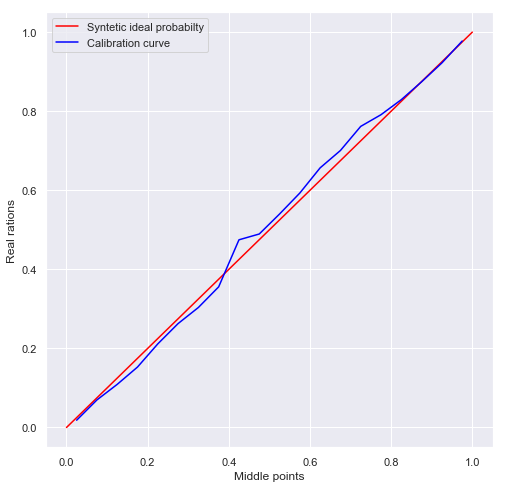

In [45]:
plot_calibration_curve(y_test, calibrated_clf.predict_proba(X_test)[:,1])

Получилось много лучше, чем было до этого, и уже, в принципе, сравнимо с логистической регрессией. <br>Для порядка попробуем еще один метод калибровки:

In [46]:
calibrated_clf2 = CalibratedClassifierCV(
                                        LinearSVC(random_state=0, tol=1e-5, max_iter=10000), 
                                        method='isotonic'
                                    )
calibrated_clf2.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(max_iter=10000, random_state=0,
                                                tol=1e-05),
                       method='isotonic')

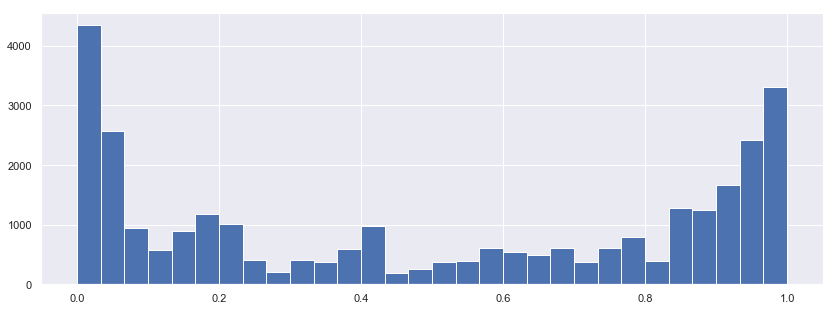

In [47]:
fig, ax = plt.subplots(1,1, figsize=(14,5))
plt.hist(calibrated_clf2.predict_proba(X_test)[:,1], bins=30)
plt.show()

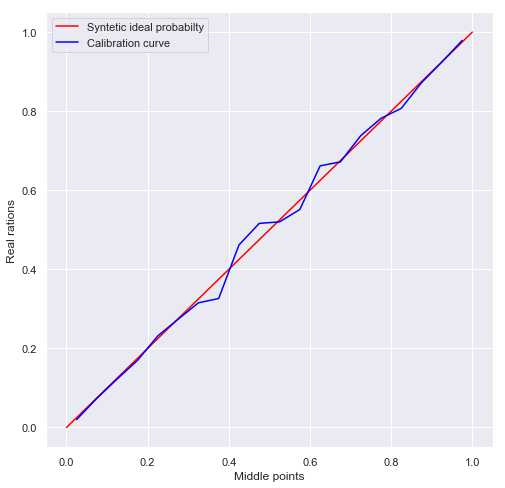

In [48]:
plot_calibration_curve(y_test, calibrated_clf2.predict_proba(X_test)[:,1])

Какая-то неупорядоченная кривая, но все еще близка к эталонной.

-----
-----
-----

Кодировать категориальные переменные в виде чисел зачастую недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

Загрузим данные с прошлогоднего конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Нам нужны только данные задачи. При этом под нужды задания мы немного модифицируем датасет:

In [49]:
data = pd.read_csv("DriverPrediction_train.csv", index_col=0)
target = data['target'].values
data = data.drop('target', axis=1)

data.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
9,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
13,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
16,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 7 to 1488027
Data columns (total 57 columns):
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_reg_03         595212 non-null float64
ps_car_01_cat     595212 non-null int64
ps

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки:

In [51]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

Посчитаем качество (работаем с ROC-AUC) на исходных признаках при применении логистической регрессии:

In [52]:
%%time
clf = LogisticRegressionCV(max_iter=2500, tol=1e-5)
clf.fit(X_train, y_train)

print("ROC-AUC:", metrics.roc_auc_score(
    y_test, clf.predict_proba(X_test)[:,1]
                                        ))
print("-----")

ROC-AUC: 0.6250792618011414
-----
CPU times: user 1min 58s, sys: 6.02 s, total: 2min 4s
Wall time: 1min 4s


Закодируем все категориальные признаки с помощью one-hot-кодирования. Обучим логистическую регрессию и посмотрим, как изменилось качество модели (с тем, что было до кодирования):

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [54]:
data.columns

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

In [55]:
categorical_features = []
for col in data.columns:
    if ('cat' in col):
        categorical_features.append(col)

In [56]:
column_transformer = ColumnTransformer([
                                        ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
                                       ])

In [57]:
%%time
X_transformed = column_transformer.fit_transform(X_train)
clf = LogisticRegressionCV(max_iter=2500, tol=1e-5)
clf.fit(X_transformed, y_train)

print("ROC-AUC:", metrics.roc_auc_score(
                            y_test, clf.predict_proba(column_transformer.transform(X_test))[:,1]
                                        ))
print("-----")

ROC-AUC: 0.6135482128350943
-----
CPU times: user 19.4 s, sys: 218 ms, total: 19.6 s
Wall time: 19.9 s


Было:
<br> ROC-AUC: 0.6250792618011414
<br> total: 2min 4s

Добавим Scaling числовых признаков:

In [58]:
numeric_features = []
for col in data.columns:
    if ('cat' not in col) and ('bin' not in col):
        numeric_features.append(col)

In [59]:
column_transformer = ColumnTransformer([
                                        ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
                                        ('scaling', StandardScaler(), numeric_features)
                                       ])

In [60]:
X_transformed = column_transformer.fit_transform(X_train)
clf = LogisticRegressionCV(max_iter=2500, tol=1e-5)
clf.fit(X_transformed, y_train)

print("ROC-AUC:", metrics.roc_auc_score(
                            y_test, clf.predict_proba(column_transformer.transform(X_test))[:,1]
                                        ))

ROC-AUC: 0.627648899038144


In [61]:
pd.DataFrame(X_transformed).head()

,0
0,"(0, 1)\t1.0\n (0, 6)\t1.0\n (0, 9)\t1.0\n ..."
1,"(0, 1)\t1.0\n (0, 7)\t1.0\n (0, 9)\t1.0\n ..."
2,"(0, 2)\t1.0\n (0, 7)\t1.0\n (0, 9)\t1.0\n ..."
3,"(0, 1)\t1.0\n (0, 7)\t1.0\n (0, 9)\t1.0\n ..."
4,"(0, 1)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."


In [62]:
X_transformed

<100000x209 sparse matrix of type '<class 'numpy.float64'>'
	with 4000000 stored elements in Compressed Sparse Row format>

Как можно было заменить, one-hot-кодирование может значительно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Закодируем категориальные переменные с помощью счётчиков. Обучим логистическую регрессию и посмотрим на качество модели на тестовом множестве:

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin

class CounterEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stats = dict()
    
    def fit(self, X, y):
        for col in X.columns:
            cur_stats = dict()
            for val in X[col].unique():
                cur_stats[int(val)] =  np.sum( (X[col] == val) & (y == 1) ) / (np.sum(X[col] == val))
            self.stats[col] = cur_stats
            
        return self
        
    def columns_transform(self, x, columns):
        x_new = np.array(x, dtype=float)
        it = 0
        for col in columns:
            x_new[it] = float( 
                            int(
                                self.stats[col].get(x[col])
                                ) 
                            )
            it += 1
            
        return x_new

    def transform(self, X):
        X_copy = X.copy()
        X_copy = X_copy.apply( self.columns_transform, axis=1, columns=X.columns)
        
        return X_copy

In [64]:
counter_transformer = ColumnTransformer([
                                        ('counter', CounterEncoder(), categorical_features),
                                        ('scaling', StandardScaler(), numeric_features)
                                        ])

In [ ]:
X_transformed = counter_transformer.fit_transform(X_train, y_train)
clf = LogisticRegressionCV(max_iter=2500, tol=1e-5)
clf.fit(X_transformed, y_train)

print("ROC-AUC:", metrics.roc_auc_score(
                                        y_test, clf.predict_proba(counter_transformer.transform(X_test))[:,1]
                                        ))

Было ROC-AUC: 0.627648899038144

In [ ]:
pd.DataFrame(X_transformed).head()

In [ ]:
from category_encoders.ce import JamesSteinEncoder

JS_transformer = ColumnTransformer([
                                    ('counter', JamesSteinEncoder(), categorical_features),
                                    ('scaling', StandardScaler(), numeric_features)
                                    ])

> Я установил соответствующий модуль, но почему-то он не ищется :/

In [ ]:
X_JStransformed = JS_transformer.fit_transform(X_train, y_train)
clfJS = LogisticRegressionCV(max_iter=2500, tol=1e-5)
clfJS.fit(X_JStransformed, y_train)

print("JS ROC-AUC:", metrics.roc_auc_score(
                                        y_test, clfJS.predict_proba(counter_transformer.transform(X_test))[:,1]
                                        ))  # predict_proba -> transform(X[, y, override_return_df])

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

Реализуем корректное вычисление счётчиков самым простым способом — добавлением шума к значениям (необходимо соблюсти баланс между избавлением от переобучения и полезностью признаков). Обучите логистическую регрессию, оценим качество:

In [ ]:
class NoiseCounterEncoder(CounterEncoding):
    def __init__(self, sigma):
        self.stats = dict()
        self.sigma = sigma
        
    def fit(self, X, y):
        CounterEncoder.fit(self, X, y)
        
        for col in self.stats:
            for val in self.stats[col]:
                self.stats[col][val] += np.random.normal(0, self.sigma)
                
        return self

In [ ]:
counter_transformer = ColumnTransformer([
                                        ('counter', NoiseCounterEncoder(0.05), categorical_features),
                                        ('scaling', StandardScaler(), numeric_features)
                                        ])

In [ ]:
X_transformed = counter_transformer.fit_transform(X_train, y_train)
clf = LogisticRegressionCV(max_iter=2500, tol=1e-5)
clf.fit(X_transformed, y_train)

print("ROC-AUC:", metrics.roc_auc_score(
                                        y_test, clf.predict_proba(counter_transformer.transform(X_test))[:,1]
                                        ))

Переобучения все-таки не было, добавление шума не особо помогает делу, только уменьшает качество.

Теперь ответим на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения.

Добавим сглаживание, описанное выше, и повторим эксперименты:

In [ ]:
class SmoothCounterEncoder(CounterEncoding):
    def __init__(self, sigma, c, prior=None):
        self.stats = dict()
        self.sigma = sigma
        self.c = c
        self.prior = prior
        
    def fit(self, X, y):
        if self.prior is None:
            self.prior = y.mean()
            
        for col in X.columns:
            cur_stats = dict()
            for val in X[col].unique():
                cur_stats[val] = (np.sum((X[col] == val) & (y == 1)) + self.c * self.prior) / (np.sum(X[col] == val) + self.c) + np.random.normal(0, self.sigma)
            self.stats[col] = cur_stats
            
        return self

In [ ]:
counter_transformer = ColumnTransformer([
                                        ('counter', SmoothCounterEncoder(0.05, 10), categorical_features),
                                        ('scaling', StandardScaler(), numeric_features)
                                        ])

In [ ]:
X_transformed = counter_transformer.fit_transform(X_train, y_train)
clf = LogisticRegressionCV(max_iter=2500, tol=1e-5)
clf.fit(X_transformed, y_train)

print("ROC-AUC:", metrics.roc_auc_score(
                                        y_test, clf.predict_proba(counter_transformer.transform(X_test))[:,1]
                                        ))

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому мы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты.

Как мы могли заметить, счётчики являются хорошей альтернативой one-hot-кодированию:

**Плюсы:**
<br>1) Меньшее потребление памяти;
<br>2) Большее количество возможностей подстроить под данные, т.к. большее количество параметров;
<br>3) Возможность уменьшить эффект переобучения через увеличение шума.

**Минусы:**
<br>1) На наших данных оказалось хуже по качеству;
<br>2) При неправильном использовании можем получить знатное переобучение;
<br>3) Тратится какое-то количество ресурсов на предпосчет нужного массива;
<br>4) Как выясним ниже, при помощи хорошего feature selection можно избавиться от главного недостатка OHE.

---
---
---

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов:

In [67]:
data = pd.read_csv("DriverPrediction_train.csv", index_col=0)
target = data['target'].values
data = data.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

In [68]:
X_train.shape

(476169, 57)

В данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить:

In [69]:
categorical_features = []
for col in data.columns:
    if ('cat' in col):
        categorical_features.append(col)

In [70]:
class Id(BaseEstimator, TransformerMixin):

    def fit(self, X, y):
        return self

    def transform(self, X):
        return X.copy()

column_transformer = ColumnTransformer([
                            ('ohe', OneHotEncoder(categories='auto', handle_unknown="ignore"), categorical_features),
                            ('id', Id(), numeric_features)
                            ])

In [71]:
X_train = column_transformer.fit_transform(X_train, y_train)
X_test = column_transformer.transform(X_test)

In [72]:
X_train.shape

(476169, 210)

Признаков стало примерно в 4 раза больше.

В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. <br>Обучим модель и посчитаем качество на тестовой выборке:

In [73]:
clf = LogisticRegressionCV(max_iter=2500, tol=1e-5)
clf.fit(X_train, y_train)

print('Train MSE score:', metrics.roc_auc_score(y_train, clf.predict_proba(X_train)[:,1]))
print('Test MSE score:', metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

Train MSE score: 0.6088834455825416
Test MSE score: 0.6139779189749427


Допустим, мы хотим оставить только 120 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

Оставьте 120 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучим модель заново и оценим её качество:

In [74]:
clf.coef_[:, :10]

array([[ 0.00247371, -0.01826635,  0.01832345, -0.0036638 ,  0.00119531,
         0.00219392, -0.02337523,  0.02124363,  0.01734488, -0.08587549]])

In [75]:
logit_coef = clf.coef_.copy()
logit_coef.sort()
top_features = clf.coef_[0] >= logit_coef[0][logit_coef.shape[1] - 120]

In [76]:
np.sum(top_features)

120

In [77]:
clf = LogisticRegressionCV(max_iter=2500, tol=1e-5)
clf.fit(X_train[:,top_features], y_train)

print('Train MSE score:', metrics.roc_auc_score(y_train, clf.predict_proba(X_train[:,top_features])[:,1]))
print('Test MSE score:', metrics.roc_auc_score(y_test, clf.predict_proba(X_test[:,top_features])[:,1]))

Train MSE score: 0.5951171427961235
Test MSE score: 0.5974500381129221


Было:
<br>Train MSE score: 0.6088834455825416
<br>Test MSE score: 0.6139779189749427

Довольно весомая просадка, но время обучения также заметно уменьшилось.

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки - не хорошо. Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки.

Кстати, в таком случае надо пересчитать качество на всех признаках.

In [78]:
X_train.shape

(476169, 210)

In [79]:
counter_transformer = ColumnTransformer([
                            ('ohe', OneHotEncoder(categories='auto', handle_unknown="ignore"), categorical_features),
                            ('scaler', StandardScaler(), numeric_features)
                            ])

In [80]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

In [81]:
X_train = column_transformer.fit_transform(X_train, y_train)
X_test = column_transformer.transform(X_test)

In [82]:
X_train.shape

(476169, 210)

In [83]:
clf = LogisticRegressionCV(max_iter=2500, tol=1e-5)
clf.fit(X_train, y_train)

print('Train MSE score:', metrics.roc_auc_score(y_train, clf.predict_proba(X_train)[:,1]))
print('Test MSE score:', metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

Train MSE score: 0.6088834455825416
Test MSE score: 0.6139779189749427


Было:
<br>Train MSE score: 0.6088834455825416
<br>Test MSE score: 0.6139779189749427

In [84]:
logit_coef = clf.coef_.copy()
logit_coef.sort()
top_features = clf.coef_[0] >= logit_coef[0][logit_coef.shape[1] - 120]

In [85]:
clf = LogisticRegressionCV(max_iter=1000, tol=1e-5)
clf.fit(X_train[:,top_features], y_train)

print('Train MSE score:', metrics.roc_auc_score(y_train, clf.predict_proba(X_train[:,top_features])[:,1]))
print('Test MSE score:', metrics.roc_auc_score(y_test, clf.predict_proba(X_test[:,top_features])[:,1]))

Train MSE score: 0.5951171427961235
Test MSE score: 0.5974500381129221


Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $mu$, $sigma$, $n$ соответственно среднее, среднеквадратичное отклонение и количество объектов каждого из классов.

Оставим 120 признаков с наибольшим значением и замерим качество:

In [86]:
from scipy.sparse import csr_matrix

def t_statistic(x, y):
    scaler_plus = StandardScaler(copy=True, with_mean=False, with_std=True)
    scaler_minus = StandardScaler(copy=True, with_mean=False, with_std=True)
    
    plus = (y == 1)
    minus = (y == 0)
    
    scaler_plus.fit(x.tocsr()[plus, :])
    scaler_minus.fit(x.tocsr()[minus, :])
    
    n_plus = np.sum(plus)
    n_minus = np.sum(minus)
    
    mu_plus = csr_matrix(x.tocsr()[plus, :]).mean(axis=0)
    var_plus = scaler_plus.var_
    
    mu_minus = csr_matrix(x.tocsr()[minus, :]).mean(axis=0)
    var_minus = scaler_minus.var_
    
    return np.abs(mu_plus - mu_minus) / np.sqrt((n_plus * var_plus + n_minus * var_minus)/(n_plus + n_minus))

In [87]:
t_train = t_statistic(X_train, y_train).ravel()
t_copy = t_train.copy()
t_copy.sort()
top_features = np.array(t_train[0] >= t_copy[0][0, t_copy.shape[1] - 120]).ravel()

In [88]:
np.sum(top_features)

120

In [89]:
clf = LogisticRegressionCV(max_iter=1000, tol=1e-5)
clf.fit(X_train[:,top_features], y_train)

print('Train MSE score:', metrics.roc_auc_score(y_train, clf.predict_proba(X_train[:,top_features])[:,1]))
print('Test MSE score:', metrics.roc_auc_score(y_test, clf.predict_proba(X_test[:,top_features])[:,1]))

Train MSE score: 0.6085953164110399
Test MSE score: 0.6138220891273137


Было:
<br>Train MSE score: 0.6088834455825416
<br>Test MSE score: 0.6139779189749427

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделаем одну итерацию и прикинем, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что значительно уменьшит время итерации. Теперь это долго, но уже приемлимо. 

*Если это всё ещё долго для комьютера, можно попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делим заново все признаки на группы по 5 штук.*

Снова оставим только 120 признаков и оценим качество на тестовой выборке:

In [90]:
X_train.shape

(476169, 210)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=24)

In [92]:
X_train.shape

(333318, 210)

In [93]:
def get_quality(X_train, y_train, X_test, y_test, features):
    clf = LogisticRegressionCV(max_iter=1500, tol=1e-4, cv=5, random_state=42)
    clf.fit(X_train[:,features], y_train)
    
    return metrics.roc_auc_score(y_test, clf.predict_proba(X_test[:,features])[:,1])

def make_iteration(X_train, y_train, X_test, y_test, features=None):
    if features is None:
        features = numpy.ones((X_train.shape[1]), dtype=bool)
    baseline = get_quality(X_train, y_train, X_test, y_test, features)
    score_record = None
    record_features = None
    
    for it in range(len(features)):
        if not features[it]:
            continue
        new_features = features.copy()
        new_features[it] = False
        
        score = get_quality(X_train, y_train, X_test, y_test, new_features)
        if (score > baseline) and ((score_record is None) or (score_record < score)):
            score_record = score
            record_features = new_features
    
    return (record_features, score_recored)

In [ ]:
%%time 
make_iteration(X_train, y_train, X_test, y_test)

__WARNING__ Одна итерация оказалсь слишком долгой, а провести около 200 таких -- нет, спасибо.

In [112]:
idx = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
X_train = X_train[idx]
y_train = y_train[idx]

Попробуем сделать одну итерацию еще раз:

In [ ]:
%%time
make_iteration(X_train, y_train, X_test, y_test)

__WARNING__ Все еще "нет, спасибо".

Будем поступать следующим образом: 
- Зафиксируем число изменяющихся признаков в один момент. Назовем его $k$ и пусть по умолчанию оно равно 5;

- Будем выбирать случайное подмножество признаков размера $k$;

- Зафиксируем количество resampling как $L$. По умолчанию $L = 20$ (да, мало).

In [94]:
def make__better_iteration(X_train, y_train, X_test, y_test, k=5, iters=20, features=None):
    if features is None:
        features = numpy.ones((X_train.shape[1]), dtype=bool)
    baseline = get_quality(X_train, y_train, X_test, y_test, features)
    score_record = None
    record_features = None
    
    for q in range(iters):
        new_features = features.copy()
        idx = np.random.choice(np.arange(features.shape[0]), k, replace=False)
        
        while False in new_features[idx]:
            idx = np.random.choice(np.arange(features.shape[0]), k, replace=False)
        new_features[idx] = False
        score = get_quality(X_train, y_train, X_test, y_test, new_features)
        
        if (score > baseline) and ((score_record is None) or (score_record < score)):
            score_record = score
            record_features = new_features
    
    return (record_features, score_record)

In [ ]:
%%time
features = numpy.ones((X_train.shape[1]), dtype=bool)
retries = 5
cur_retries = 0

while np.sum(features) > 125 and cur_retries < retries:
    top_features, score =  make_iteration2(X_train, y_train, X_test, y_test, k=5, iters=20, features=features)
    if top_features is None:
        cur_retries += 1
    else:
        features = top_features
        print(f"Score: {score}")
        
print("-----")

> Алгоритм работает крайне долго (>4 часов), поэтому предъявлю данные с другого ноутбука:

<br>Score: 0.6112584410660119
<br>Score: 0.6116567961866244
<br>Score: 0.6142929365881843
<br>Score: 0.6155286274014155
<br>Score: 0.6161707352303916
<br>Score: 0.6168895800231115
<br>Score: 0.6173736999855554
<br>Score: 0.6186195471616351
<br>Score: 0.6193372634695941
<br>Score: 0.6196114852665029
<br>Score: 0.6197570598006645
<br>Score: 0.6199850137223747
<br>Score: 0.6281180033944822
<br>Score: 0.6299766177957533
<br>Score: 0.6315361837353748
<br>Score: 0.6324209157879532
<br>Score: 0.6329208345370504
<br>Score: 0.6331205763397372
<br>Score: 0.6332819496605518
<br>Score: 0.6338823035533729
<br>Score: 0.6352635689007655
<br>Score: 0.6355028076700852
<br>Score: 0.636477818503539
<br>Score: 0.6372102051133901
<br>Score: 0.637660470533006
<br>Score: 0.6377676765852953
<br>Score: 0.6384560522894699
<br>Score: 0.6387449443882709
<br>Score: 0.6391624837498195
<br>Score: 0.639656760075112
<br>Score: 0.6399151830853675
<br>Score: 0.6401329806442294
<br>Score: 0.6403710909287881
<br>Score: 0.6404782969810775
<br>Score: 0.6405843745486061
<br>Score: 0.6406295139390437
<br>Score: 0.6406407987866531
<br>Score: 0.6408540824064712
<br>Score: 0.6408811660407338
<br>Score: 0.6409274339159324
<br>Score: 0.6417252726419183
<br>Score: 0.6417264011266791
<br>-----
<br>CPU times: user 4h 31min 50s, sys: 2.74 s, total: 4h 31min 52s
<br>Wall time: 4h 34min 29s

Было:


> Далее нужно работать с новыми признаками, у меня их нет в этом ноутбуке, поэтому будем смотреть на текст.

Алгоритм оставил 125 признаков.

Результат на тестовых данных, уже обучившись на всех данных:

In [ ]:
%%time
clf = LogisticRegressionCV(max_iter=1500, cv=5, tol=1e-5)
clf.fit(X_train[:,features], y_train)

print('Train MSE score:', metrics.roc_auc_score(y_train, clf.predict_proba(X_train[:,features])[:,1]))
print('Test MSE score:', metrics.roc_auc_score(y_test, clf.predict_proba(X_test[:,features])[:,1]))
print('-----')

<br>Train MSE score: 0.614905214481
<br>Test MSE score: 0.617565610373
<br>-----
<br>CPU times: user 3min 42s, sys: 516 ms, total: 3min 43s
<br>Wall time: 4min 5s

В нашем случае наилучшим оказался метод фильтрации, наилучшим во всех смыслах -- он одновременно и быстрый, и дает максимальный результат, но все равно было сделано слишком много приближений и аппроксимаций в жадном отборе, поэтому получился результат, слабее, чем у фильтрации. При этом самыми бесполезными оказались методы, работающие через веса линейного классификатора, хотя работают достаточно быстро.

**embedded methods**

Плюсы:
- Быстрый, если уже есть обученная модель;
- Явная интерпретация результата отбора.

Минусы:
- Дает слабенький результат;
- Любые модификации метода требуют переобучать модель.

**filter methods**

Плюсы:
- Также быстрый, причем вне зависимости от имеющихся данных;
- Дает высокий результат, почти неотличимый от того, что было до удаления.

Минусы:
- Требует подбора "фильтрирующей статистики" и её подсчет может оказаться сильно сложнее, как в нашем случае.

**greedy methods**

Плюсы:
- Потенциально может дать крайне высокий результат.

Минусы:
- Требует огромных мощностей и по сути происходит конвертация мощностей в результат напрямую.

---
---
---

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку. 

Воспользуемся той же самый задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты. 

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000. 

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [11]:
data = pd.read_csv('DriverPrediction_train.csv', index_col=0)
target = data['target'].values
data = data.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

Посчитаем долю положительных примеров в выборке:

In [12]:
np.sum(target == 1)/target.shape[0]

0.036447517859182946

Давайте закодируем категориальные признаки с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить:

In [13]:
categorical_features = []
for col in data.columns:
    if ('cat' in col):
        categorical_features.append(col)

In [15]:
numeric_features = []
for col in data.columns:
    if ('cat' not in col) and ('bin' not in col):
        numeric_features.append(col)

In [16]:
column_transformer = ColumnTransformer([
                        ('ohe', OneHotEncoder(categories='auto', handle_unknown="ignore"), categorical_features),
                        ('scaler', StandardScaler(), numeric_features)
                    ])

In [17]:
X_train = column_transformer.fit_transform(X_train, y_train)
X_test = column_transformer.transform(X_test)

В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. <br>Обучим модель, сделаем предсказания на тестовой выборке:

In [19]:
%%time
clf = LogisticRegressionCV(max_iter=5000, cv=5, tol=1e-5)
clf.fit(X_train, y_train)
y_pred =clf.predict_proba(X_test)[:,1]

CPU times: user 2min 54s, sys: 8.56 s, total: 3min 3s
Wall time: 3min 7s


Посчитаем ROC-AUC:

In [20]:
print('Test ROC-AUC score:', metrics.roc_auc_score(y_test, y_pred))

Test ROC-AUC score: 0.6340036914286838


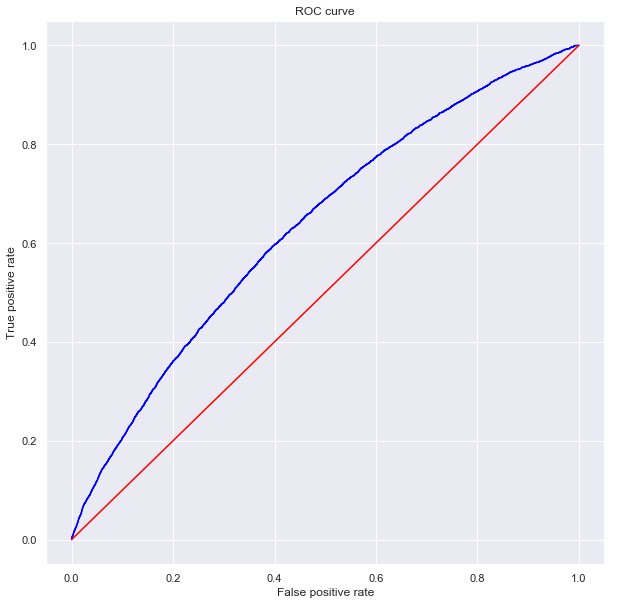

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

fig, ax = plt.subplots(1,1, figsize=(10,10))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")

plt.plot(fpr, tpr, color='blue')
plt.plot((0,1), (0,1), color='red')

У нас довольно несбалансированные положительный и отрицательный классы, поэтому такое невысокое качество.

Построим precision-recall кривую на тестовой выборке:

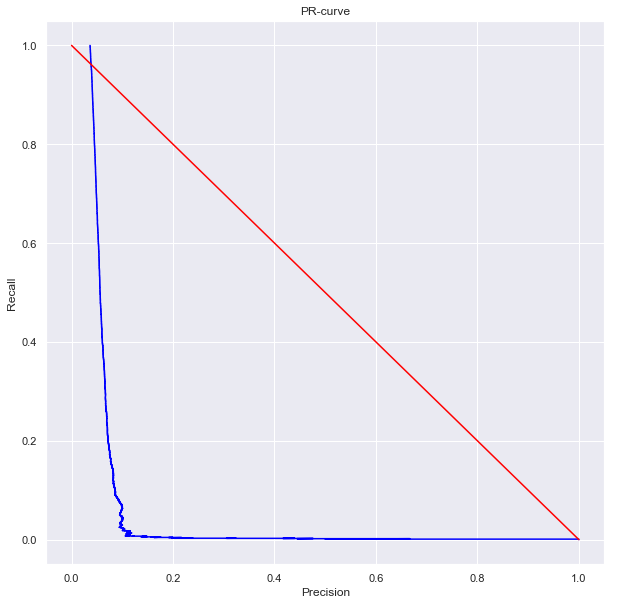

In [22]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)

fig, ax = plt.subplots(1,1, figsize=(10,10))
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR-curve")

plt.plot(precision, recall, color='blue')
plt.plot((1,0), (0,1), color='red')

Опять же, проблема в дисбалансе классов.

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

Предположим, что нам надо подобрать порог такой, чтобы среди наших положительных предсказаний 95% действительно обратились бы по страховому случаю. Подберем соответствующий порог, оценим на нём precision, recall.

Заметим, что подбирать порог по тестовой выборке -- это довольно сомнительное решение с точки зрения переобучения. Поэтому нам стоит разделить обучающую выборку на две -- обучающую и валидационную:

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=24)

In [24]:
%%time
clf = LogisticRegressionCV(max_iter=5000, cv=5, tol=1e-5)
clf.fit(X_train, y_train)
y_valid_pred = clf.predict_proba(X_valid)[:,1]

CPU times: user 2min 26s, sys: 7.62 s, total: 2min 34s
Wall time: 2min 37s


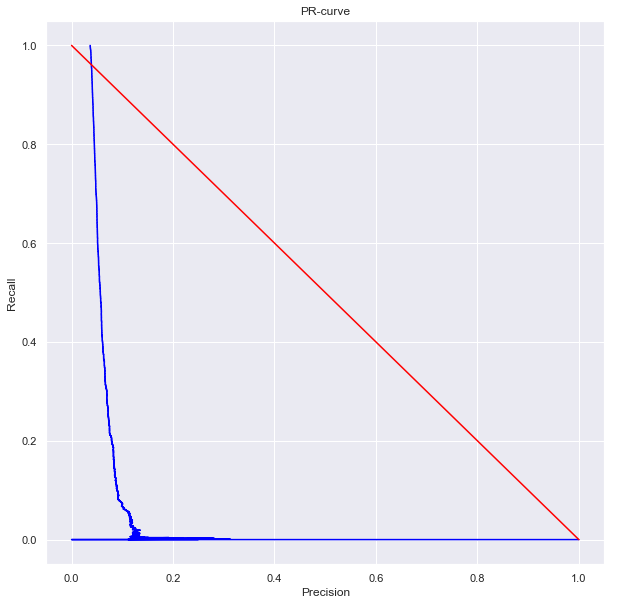

In [26]:
precision, recall, thresholds = metrics.precision_recall_curve(y_valid, clf.predict_proba(X_valid)[:,1])

fig, ax = plt.subplots(1,1, figsize=(10,10))
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR-curve")

plt.plot(precision, recall, color='blue')
plt.plot((1,0), (0,1), color='red')

По определению precision - это доля True Positive объектов среди False Positive и True Positive, то есть ровно количество тех, кто обратится по страховому случаю среди всех, кому мы одобрили обслуживание. Значит, для этого пункта нас интересует значение precision $\geq 0.95$. 

In [27]:
recall[(precision > 0.95)]

array([0.])

Подсчитанный recall говорит, что такое значение недостижимо в нашем алгоритме: он всегда выдает 1, а фирма грустит без денег, так как одобрила все получения страховок.

Понять, что применять этот алгоритм на самих тестовых данных бессмысленно, можно по старому PR графику, который выше: если сделать сечение $precision > 0.95$, то можно легко увидеть, что нам подойдет только $recall = 0$.

Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился. 

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги, и те, кто не обратился бы, то есть принёс бы нам деньги. Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной.

Найдем такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный.

Перепишем задачу в терминах матрицы ошибок. Получаем следующее:
$$
    score = -100'000 \cdot TP + 5'000 \cdot FP \to \max
$$

Сначала разберемся со случаем, когда мы просто хотим не выйти в минус: $ score \geq 0$.

In [33]:
print(recall[(precision <= 1/21)][:5])
print(recall[(precision <= 1/21)][-6:-1])

[1.         0.99971198 0.99971198 0.99971198 0.99971198]
[0.72407834 0.72407834 0.72407834 0.         0.        ]


In [34]:
suitable_thresholds = thresholds[(precision[1:] <= 1/21)]
suitable_thresholds.shape

(42285,)

Технически, нам подходит любое значение порога из перечисленных выше, а их достаточно много. Самое банальное значение порога -- это то, при котором мы откажем всем клиентам, и оно будет работать точно на тестовой выборке.

При этом заметим, что при минимально возможном precision мы явно не получаем необходимые деньги, так как в этом случае мы выходим в чистый ноль (никому не выдали страховку). Следовательно, наше максимальное значение заработка должно находиться где-то посередине и мы лишь знаем, что его нужно искать при precision меньше границы 1/21. 

Так как нужно перебрать всего 42458 границ, а проверка её -- это просто скалярное произведение, то давайте проведем просто линейный поиск в лоб по валидационный выборке, а затем посчитаем итоговый выбранный порог на тестовой выборке:

In [35]:
def get_score(y_test, y_pred):
    
    return np.sum(y_pred )* 5000 - np.sum(y_test * y_pred) * (100000 + 5000)

In [37]:
best_score = 0
best_thershold = None

for threshold in suitable_thresholds:
    score = get_score(y_valid, (clf.predict_proba(X_valid)[:,1] >= threshold))
    if score > best_score:             # NEED y_valid_pred !!!
        best_score = score
        best_threshold = threshold

print(best_score)

111020000


In [39]:
best_threshold

0.011936747968574744

In [42]:
print(precision[1:][thresholds == best_threshold])
print(precision[:-1][thresholds == best_threshold])

[0.03650073]
[0.03650034]


In [43]:
print(recall[1:][thresholds == best_threshold])
print(recall[:-1][thresholds == best_threshold])

[0.99971198]
[0.99971198]


Результат на тестовой выборке (получим окончательную сумму выигрыша):

In [44]:
get_score(y_test, (clf.predict_proba(X_test)[:,1] >= best_threshold))

140785000

Ура, богаты!